<a href="https://colab.research.google.com/github/EChoudhury/RealTimeAI/blob/main/Real_Time_AI_HW4_Choudhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {6: 0, 7: 1, 8: 2, 9: 3}
class_names = ['frog', 'horse', 'ship','truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [6, 7, 8, 9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [6, 7, 8, 9]]

**Question 1 Part 1:**

In [6]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200

t = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
elapsed = time.time() - t
print("Elapsed Training Time: %s" % elapsed)

Epoch: 0, Loss: 0.745326
Epoch: 1, Loss: 0.646128
Epoch: 2, Loss: 0.797681
Epoch: 3, Loss: 0.797029
Epoch: 4, Loss: 0.667015
Epoch: 5, Loss: 0.583316
Epoch: 6, Loss: 0.913675
Epoch: 7, Loss: 0.500480
Epoch: 8, Loss: 0.572505
Epoch: 9, Loss: 0.684698
Epoch: 10, Loss: 0.590175
Epoch: 11, Loss: 0.713271
Epoch: 12, Loss: 0.457858
Epoch: 13, Loss: 0.451838
Epoch: 14, Loss: 0.422193
Epoch: 15, Loss: 0.513691
Epoch: 16, Loss: 0.670527
Epoch: 17, Loss: 0.325947
Epoch: 18, Loss: 0.453996
Epoch: 19, Loss: 0.557100
Epoch: 20, Loss: 0.377720
Epoch: 21, Loss: 0.351241
Epoch: 22, Loss: 0.300203
Epoch: 23, Loss: 0.329142
Epoch: 24, Loss: 0.278762
Epoch: 25, Loss: 0.240725
Epoch: 26, Loss: 0.371935
Epoch: 27, Loss: 0.171413
Epoch: 28, Loss: 0.122777
Epoch: 29, Loss: 0.242501
Epoch: 30, Loss: 0.196924
Epoch: 31, Loss: 0.106221
Epoch: 32, Loss: 0.167923
Epoch: 33, Loss: 0.076605
Epoch: 34, Loss: 0.130320
Epoch: 35, Loss: 0.127546
Epoch: 36, Loss: 0.139069
Epoch: 37, Loss: 0.173204
Epoch: 38, Loss: 0.098

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [9]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.774000


**Question 1, Part 2:**

In [10]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [11]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

t = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
elapsed = time.time() - t
print("Elapsed Training Time: %s" % elapsed)

Epoch: 0, Loss: 0.901608
Epoch: 1, Loss: 0.802176
Epoch: 2, Loss: 0.482365
Epoch: 3, Loss: 0.843536
Epoch: 4, Loss: 0.826616
Epoch: 5, Loss: 0.605048
Epoch: 6, Loss: 0.696433
Epoch: 7, Loss: 0.674695
Epoch: 8, Loss: 0.652445
Epoch: 9, Loss: 0.729730
Epoch: 10, Loss: 0.479166
Epoch: 11, Loss: 0.650773
Epoch: 12, Loss: 0.618325
Epoch: 13, Loss: 0.218682
Epoch: 14, Loss: 0.519471
Epoch: 15, Loss: 0.368111
Epoch: 16, Loss: 0.435241
Epoch: 17, Loss: 0.497027
Epoch: 18, Loss: 0.312156
Epoch: 19, Loss: 0.454031
Epoch: 20, Loss: 0.315858
Epoch: 21, Loss: 0.103988
Epoch: 22, Loss: 0.109139
Epoch: 23, Loss: 0.187654
Epoch: 24, Loss: 0.694715
Epoch: 25, Loss: 0.092136
Epoch: 26, Loss: 0.086972
Epoch: 27, Loss: 0.172950
Epoch: 28, Loss: 0.075441
Epoch: 29, Loss: 0.100773
Epoch: 30, Loss: 0.142153
Epoch: 31, Loss: 0.037859
Epoch: 32, Loss: 0.055102
Epoch: 33, Loss: 0.042593
Epoch: 34, Loss: 0.059024
Epoch: 35, Loss: 0.028703
Epoch: 36, Loss: 0.025711
Epoch: 37, Loss: 0.024649
Epoch: 38, Loss: 0.004

In [13]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [14]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.762000


In [15]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [16]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [17]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [18]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [19]:
conv.bias.shape

torch.Size([16])

In [20]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [21]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


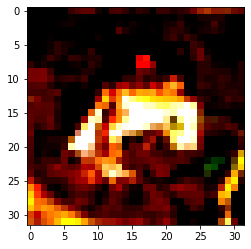

In [22]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

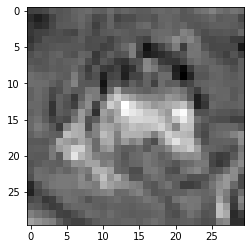

In [23]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [24]:
output.shape

torch.Size([1, 16, 30, 30])

In [25]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [26]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [27]:
with torch.no_grad():
    conv.bias.zero_()

In [28]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

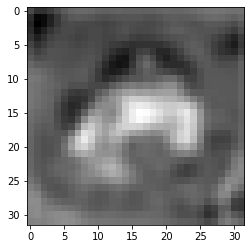

In [29]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [30]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

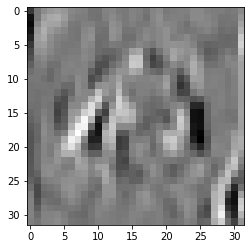

In [31]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [32]:
pool = nn.MaxPool2d(2)

In [33]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [35]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [36]:
sum([p.numel() for p in model.parameters()])

18090

In [38]:
#model(img.unsqueeze(0))

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [40]:
model = Net()

sum([p.numel() for p in model.parameters()])

18090

In [41]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0175, -0.1526]], grad_fn=<AddmmBackward>)

**Question 2 Part 1:**

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,shuffle=True)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Training on %s." % device)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
if torch.cuda.is_available():
    model.cuda()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

t = time.time()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
elapsed = time.time() - t
print("Elapsed Training Time: %s" % elapsed)

Training on cuda.
Epoch: 0, Loss: 1.098813
Epoch: 1, Loss: 0.737105
Epoch: 2, Loss: 0.702897
Epoch: 3, Loss: 0.532809
Epoch: 4, Loss: 0.694577
Epoch: 5, Loss: 0.493176
Epoch: 6, Loss: 0.797063
Epoch: 7, Loss: 0.592678
Epoch: 8, Loss: 0.557560
Epoch: 9, Loss: 0.312157
Epoch: 10, Loss: 0.438442
Epoch: 11, Loss: 0.529617
Epoch: 12, Loss: 0.421011
Epoch: 13, Loss: 0.353759
Epoch: 14, Loss: 0.424824
Epoch: 15, Loss: 0.496984
Epoch: 16, Loss: 0.213986
Epoch: 17, Loss: 0.263669
Epoch: 18, Loss: 0.224474
Epoch: 19, Loss: 0.354286
Epoch: 20, Loss: 0.167596
Epoch: 21, Loss: 0.386157
Epoch: 22, Loss: 0.444350
Epoch: 23, Loss: 0.263629
Epoch: 24, Loss: 0.311011
Epoch: 25, Loss: 0.318216
Epoch: 26, Loss: 0.504663
Epoch: 27, Loss: 0.352319
Epoch: 28, Loss: 0.449613
Epoch: 29, Loss: 0.120360
Epoch: 30, Loss: 0.255378
Epoch: 31, Loss: 0.311483
Epoch: 32, Loss: 0.172962
Epoch: 33, Loss: 0.215175
Epoch: 34, Loss: 0.428238
Epoch: 35, Loss: 0.263389
Epoch: 36, Loss: 0.177081
Epoch: 37, Loss: 0.282921
Epoc

In [43]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.998650


In [44]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.898750


**Question 2 Part 2:**

In [45]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [46]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [47]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [48]:
label_map = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Training on %s." % device)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

if torch.cuda.is_available():
    model.cuda()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

t = time.time()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
elapsed = time.time() - t
print("Elapsed Training Time: %s" % elapsed)

Training on cuda.
Epoch: 0, Loss: 1.944742
Epoch: 1, Loss: 1.836574
Epoch: 2, Loss: 1.329604
Epoch: 3, Loss: 0.990800
Epoch: 4, Loss: 1.356710
Epoch: 5, Loss: 1.105756
Epoch: 6, Loss: 1.176264
Epoch: 7, Loss: 1.055281
Epoch: 8, Loss: 1.385860
Epoch: 9, Loss: 1.275826
Epoch: 10, Loss: 1.002669
Epoch: 11, Loss: 0.928109
Epoch: 12, Loss: 1.099044
Epoch: 13, Loss: 1.454239
Epoch: 14, Loss: 1.076513
Epoch: 15, Loss: 0.754186
Epoch: 16, Loss: 0.751196
Epoch: 17, Loss: 1.088191
Epoch: 18, Loss: 0.885515
Epoch: 19, Loss: 1.413347
Epoch: 20, Loss: 1.058279
Epoch: 21, Loss: 0.850341
Epoch: 22, Loss: 1.210542
Epoch: 23, Loss: 1.074181
Epoch: 24, Loss: 0.527035
Epoch: 25, Loss: 0.988931
Epoch: 26, Loss: 0.770287
Epoch: 27, Loss: 0.906674
Epoch: 28, Loss: 0.682707
Epoch: 29, Loss: 0.695749
Epoch: 30, Loss: 1.280113
Epoch: 31, Loss: 1.135671
Epoch: 32, Loss: 0.625862
Epoch: 33, Loss: 0.741362
Epoch: 34, Loss: 0.644328
Epoch: 35, Loss: 1.227960
Epoch: 36, Loss: 0.940071
Epoch: 37, Loss: 0.543236
Epoc

In [50]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.800920


In [51]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.604700


**Question 2 Part 3:**

In [52]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 16, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * 16)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [53]:
model = Net()
#model(img.unsqueeze(0))

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Training on %s." % device)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * 16, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * 16)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

if torch.cuda.is_available():
    model.cuda()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

t = time.time()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
elapsed = time.time() - t
print("Elapsed Training Time: %s" % elapsed)

Training on cuda.
Epoch: 0, Loss: 2.010870
Epoch: 1, Loss: 1.934708
Epoch: 2, Loss: 1.846900
Epoch: 3, Loss: 1.645098
Epoch: 4, Loss: 1.339199
Epoch: 5, Loss: 1.252520
Epoch: 6, Loss: 1.497247
Epoch: 7, Loss: 1.232819
Epoch: 8, Loss: 0.822125
Epoch: 9, Loss: 1.048250
Epoch: 10, Loss: 1.188051
Epoch: 11, Loss: 1.014526
Epoch: 12, Loss: 0.938415
Epoch: 13, Loss: 1.620400
Epoch: 14, Loss: 1.552605
Epoch: 15, Loss: 1.193309
Epoch: 16, Loss: 1.142602
Epoch: 17, Loss: 0.809098
Epoch: 18, Loss: 1.207442
Epoch: 19, Loss: 0.851521
Epoch: 20, Loss: 0.893926
Epoch: 21, Loss: 1.014975
Epoch: 22, Loss: 0.771671
Epoch: 23, Loss: 0.727495
Epoch: 24, Loss: 0.936012
Epoch: 25, Loss: 0.792505
Epoch: 26, Loss: 0.719492
Epoch: 27, Loss: 1.229041
Epoch: 28, Loss: 0.919473
Epoch: 29, Loss: 0.582355
Epoch: 30, Loss: 0.490523
Epoch: 31, Loss: 0.653714
Epoch: 32, Loss: 0.923506
Epoch: 33, Loss: 0.608235
Epoch: 34, Loss: 1.017840
Epoch: 35, Loss: 0.737337
Epoch: 36, Loss: 0.845214
Epoch: 37, Loss: 0.634501
Epoc

In [55]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.765400


In [56]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print("Using %s." % device)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Using cuda.
Accuracy: 0.659400
